In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import savgol_filter

## Trying to improve results

#### Taking means from multiple spectroscopy runs
Each current column was saved in a big data frame and once all current values were processed, the mean was calculated and stored. The corresponding voltages were the same and kept

In [2]:
#Initialising each variable
file_prefix = "I-V spectroscopy"
materials = ["Graphite", "Gold", "Silicon"]

#dictionary to hold material, mean current data frame pairs
mean_dfs = {}

#iterating over each material
for material in materials:
    #setting up data frame to hold each current value
    volt_column = False
    grand_df = pd.DataFrame({})

    #looping over 16 csv w/ the naming convention
    for i in range(1, 17):
        #storing raw spectroscopy data in data frame
        spectroscopy = pd.read_csv(f"Worthwhile Scans\\week 5\\Spectroscopy {material}\\{file_prefix} {i}.csv",
                               names=["Tip Voltage (mV)", "Current (nA)"],
                               sep=";")

        #if statement set up to only write voltage column once
        if volt_column == False:
            grand_df["Tip Voltage (mV)"] = spectroscopy["Tip Voltage (mV)"]
            volt_column = True

        #Writing current to big data frame
        grand_df[f"Current (nA) {i}"] = spectroscopy["Current (nA)"]

        #calculate mean current of all 16 current
        mean_df = pd.DataFrame({"Tip Voltage (mV)":grand_df["Tip Voltage (mV)"],
                           "Mean Current (nA)":grand_df.iloc[:, 1:].mean(axis=1)})
        mean_df.to_csv(f"I-V mean spectroscopy {material}.csv", index=False)

        #write data frame of voltage and current to dictionary
        mean_dfs[material] = mean_df

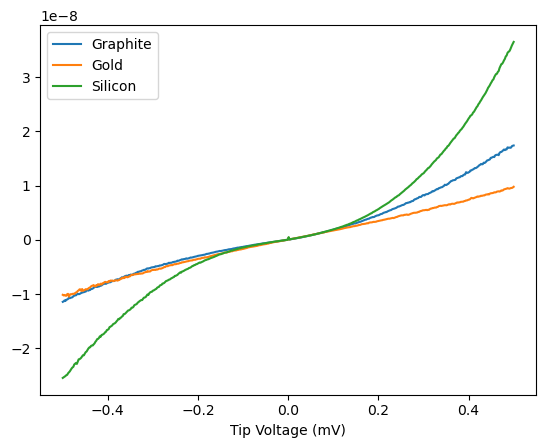

In [3]:
fig, ax = plt.subplots()
for mat, dfs in mean_dfs.items():
    dfs.plot("Tip Voltage (mV)", "Mean Current (nA)", ax = ax, label = mat)

### Running the data through a filter

The filter chosen was the _Savitzky-Golay_ filter due to its nature in fitting a polynomial to the data while being able to maintain the nuances of it. It also has various parameters that can be played around with to obtain more desirable results.

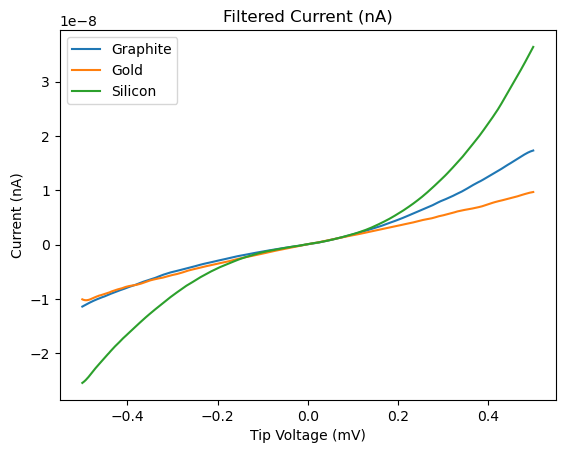

In [4]:
fig, ax = plt.subplots()
for mat, dfs in mean_dfs.items():
    spectroscopy_filtered = savgol_filter(dfs["Mean Current (nA)"], window_length = 25, polyorder = 3, mode = 'interp')
    ax.plot(dfs["Tip Voltage (mV)"], spectroscopy_filtered, label = mat)
    dfs["Filtered Current (nA)"] = spectroscopy_filtered
    dfs.to_csv(f"I-V mean and filter spectroscopy {mat}.csv", index=False)
ax.set_xlabel("Tip Voltage (mV)")
ax.set_ylabel("Current (nA)")
ax.set_title("Filtered Current (nA)")
plt.legend()

### Making all the plots.

The density of states is related to the derivative of the current and voltage of the material. The expected shapes should be here on [page 16](https://depts.washington.edu/nanolab/NUE_UNIQUE/Background/AFM.pdf) [1]. While natural logs were taken in that paper, we obtained more convincing results without taking natural log.

C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\function_base.py:1242: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\function_base.py:1243: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\function_base.py:1244: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\function_base.py:1250: RuntimeWarning: invalid value encountered in add
  out[tuple(slice1)] = a * f[tuple(slice2)] + b * f[tuple(slice3)] + c * f[tuple(slice4)]


<Figure size 1000x600 with 0 Axes>

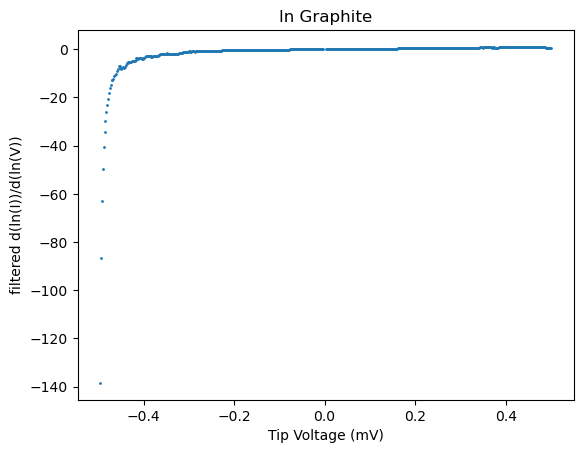

<Figure size 1000x600 with 0 Axes>

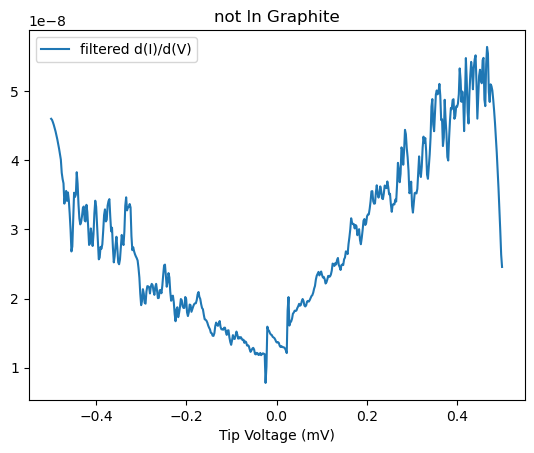

C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\function_base.py:1242: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\function_base.py:1243: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\function_base.py:1244: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\function_base.py:1250: RuntimeWarning: invalid value encountered in add
  out[tuple(slice1)] = a * f[tuple(slice

<Figure size 1000x600 with 0 Axes>

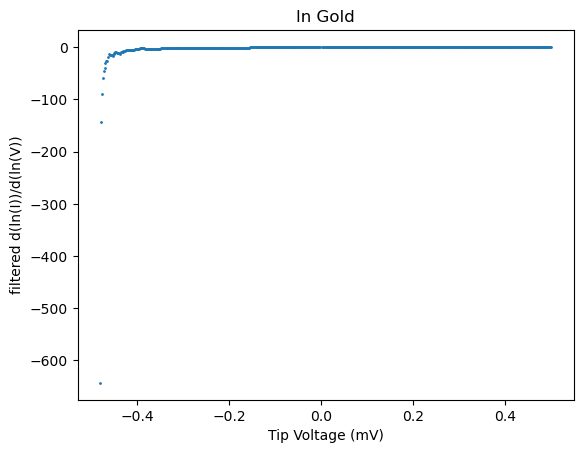

<Figure size 1000x600 with 0 Axes>

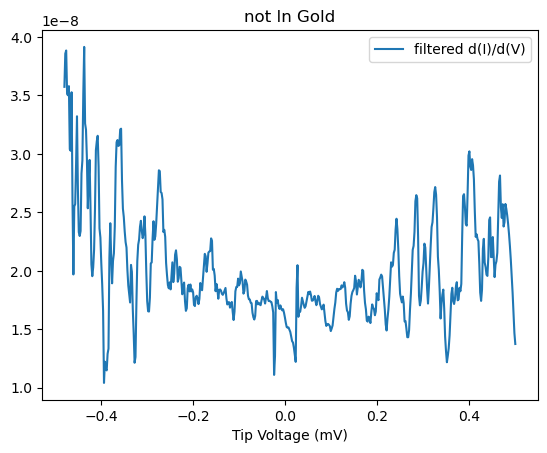

C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\function_base.py:1242: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\function_base.py:1243: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\function_base.py:1244: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\function_base.py:1250: RuntimeWarning: invalid value encountered in add
  out[tuple(slice1)] = a * f[tuple(slice2)] + b * f[tuple(slice3)] + c * f[tuple(slice4)]


<Figure size 1000x600 with 0 Axes>

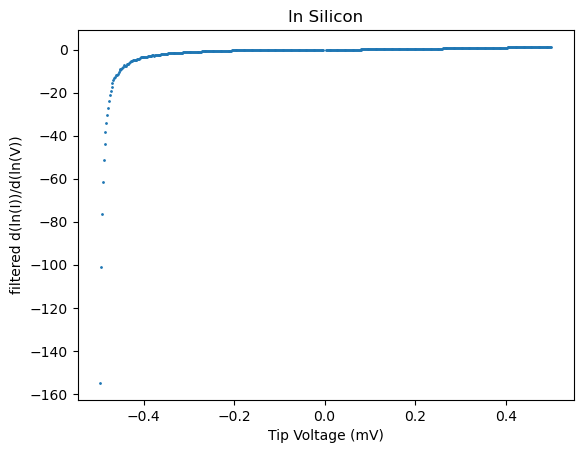

<Figure size 1000x600 with 0 Axes>

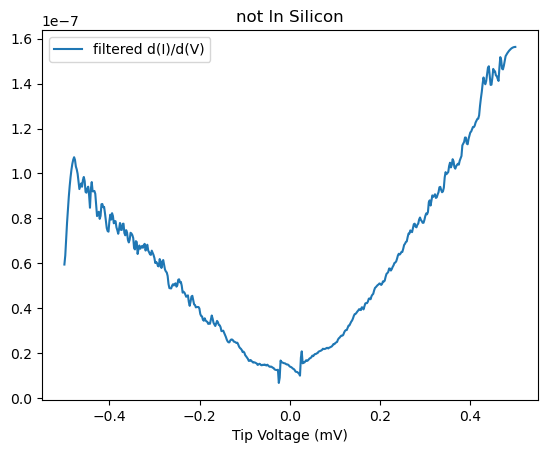

In [5]:
for mat, dfs in mean_dfs.items():
    # Calculate the logs and gradient
    
    dfs["Filtered Current (nA)"] = dfs["Filtered Current (nA)"] + np.abs(dfs["Filtered Current (nA)"][0])
    log_current = np.log((dfs["Filtered Current (nA)"]))
    log_voltage = np.log(np.abs(dfs["Tip Voltage (mV)"]))
    dfs["filtered d(ln(I))/d(ln(V))"] = np.gradient(log_current, log_voltage)
    dfs["filtered d(I)/d(V)"] = np.gradient(dfs["Filtered Current (nA)"], dfs["Tip Voltage (mV)"])

    # Plot the derivative with an increased figure size
    plt.figure(figsize=(10, 6))  # Set figure size (width, height)
    if mat == "Gold":
        dfs = dfs[10:]
    dfs.plot("Tip Voltage (mV)", "filtered d(ln(I))/d(ln(V))", kind = "scatter", s = 1)
    plt.title(f"ln {mat}")
    plt.show()

    #plot the derivative without natural logs with an increased figure size
    plt.figure(figsize=(10, 6))  # Set figure size (width, height)
    dfs.plot("Tip Voltage (mV)", "filtered d(I)/d(V)")
    plt.title(f"not ln {mat}")
    plt.show()

## References

[1] [Nanoscience of the Tip](https://depts.washington.edu/nanolab/NUE_UNIQUE/Background/AFM.pdf)